In [1]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
!pip install 'monai[all]'
!pip install torchio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [223]:
from os.path import dirname, join
import os

import numpy as np
import torch
from monai.transforms import LoadImage
import matplotlib.pyplot as plt
import torchio as tio

# Script

In [224]:
root_dir = "/content/drive/MyDrive/dev/Molloilab/cac-simulation/images_new"

In [225]:
sizes = ["large", "medium", "small"]
densities = ["low", "normal"]
energies = ["80", "100", "120", "135"]

In [226]:
random_motion = tio.RandomMotion(num_transforms=3, image_interpolation="bspline")

In [227]:
for _size in sizes:
    for density in densities:
        for energy in energies:
            print(_size, density, energy)

            # Load DICOM Images Using Monai
            dcm_path = join(root_dir, _size, density, energy)
            data, meta = LoadImage()(dcm_path)
            data.numpy()

            # Perform Random Motion Augmentation Using TorchIO
            phantom = np.swapaxes(data, 0, 2)
            phantom = np.reshape(phantom, (1, phantom.shape[0], phantom.shape[1], phantom.shape[2]))
            motion_phantom = random_motion(phantom)
            motion_phantom = np.reshape(motion_phantom, (phantom.shape[1], phantom.shape[2], phantom.shape[3]))
            motion_phantom = np.swapaxes(motion_phantom, 0, 2)

            # Save Numpy Array
            np_path = join(dirname(dcm_path), energy + "-motion-3")
            np.save(np_path, motion_phantom)

large low 80
large low 100
large low 120
large low 135
large normal 80
large normal 100
large normal 120
large normal 135
medium low 80
medium low 100
medium low 120
medium low 135
medium normal 80
medium normal 100
medium normal 120
medium normal 135
small low 80
small low 100
small low 120
small low 135
small normal 80
small normal 100
small normal 120
small normal 135


# Test

## Load DICOM Image Using Monai

In [210]:
dcm_path = join(root_dir, sizes[0], densities[1], energies[0])
dcm_path

'/content/drive/MyDrive/dev/Molloilab/cac-simulation/images_new/large/normal/80'

In [211]:
data, meta = LoadImage()(dcm_path)
data.numpy()
data.shape

(840, 640, 6)

In [212]:
xs, ys = [380, 450], [170, 250]

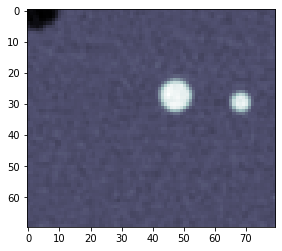

In [213]:
plt.imshow(data[xs[0]:xs[1], ys[0]:ys[1], 3], cmap="bone")

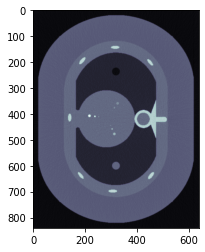

In [214]:
plt.imshow(data[:, :, 3], cmap="bone")

## Perform Random Motion Augmentation Using TorchIO

In [219]:
phantom = np.swapaxes(data, 0, 2)
phantom = np.reshape(phantom, (1, phantom.shape[0], phantom.shape[1], phantom.shape[2]))
phantom.shape

(1, 6, 640, 840)

In [220]:
motion_phantom = random_motion(phantom)
motion_phantom = np.reshape(motion_phantom, (phantom.shape[1], phantom.shape[2], phantom.shape[3]))
motion_phantom = np.swapaxes(motion_phantom, 0, 2)

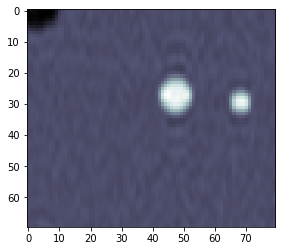

In [221]:
plt.imshow(motion_phantom[xs[0]:xs[1], ys[0]:ys[1], 3], cmap="bone")

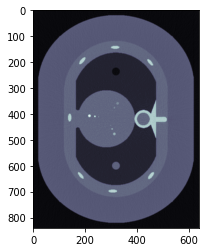

In [222]:
plt.imshow(motion_phantom[:, :, 3], cmap="bone")

## Save Numpy Array

In [ ]:
# np_path = join(dirname(dcm_path), energies[0] + "-motion")

In [ ]:
# np.save(np_path, motion_phantom)